Спектральный анализ
==

Области применения в биологии и медицине
--
- Анализ электрофизиологических сигналов
- MRI томография
- Устразвуковые обследования
- Радар/Сонар обнаружение животных в воде и воздухе
- Микроскопия, обработка цифровых изображений



+ Преобразование Фурье ( Discrete Fourier Transform (DFT))
---


$$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N}$$

Представление вектора в виде вектора такого же размера с комплексными числами, соответствующим частотным составляющим.

В векторной форме:

$\vec{X} = M \cdot \vec{x}$

, где матрица $M$

$M_{kn} = e^{-i~2\pi~k~n~/~N}$

Если переставить члены местами - получим обратное преобразование Фурье ( Inverse Discrete Fourier Transform)

In [1]:
%pylab inline
import scipy.signal as signal

Populating the interactive namespace from numpy and matplotlib


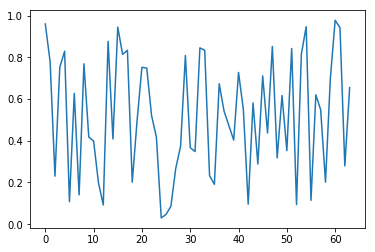

In [2]:
x = random.random(64)
N = x.shape[0]
n = arange(N)
plot(n,x);

C:\a\WinPython\python-3.5.2.amd64\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


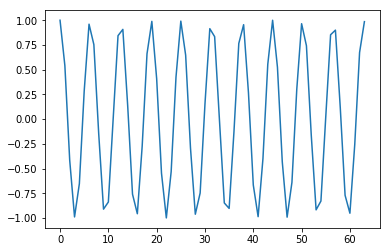

In [3]:
plot(n, exp(1j*n));

C:\a\WinPython\python-3.5.2.amd64\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


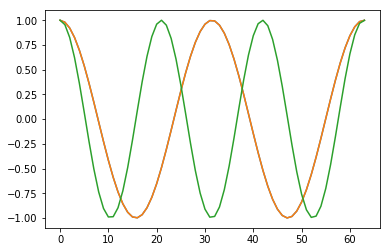

In [4]:
plot(n, exp(.2j*n), n, exp(-.2j*n), n, exp(.3j*n));

In [124]:
k = n.reshape((N, 1))
k.shape

(64, 1)

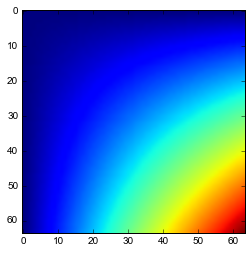

In [125]:
imshow((pi * k * n /N)); 

C:\a\WinPython\python-3.4.2.amd64\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


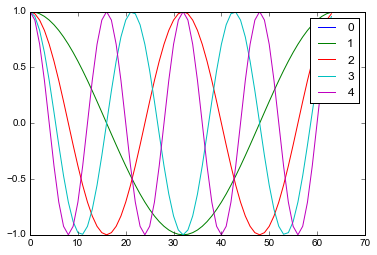

In [126]:
M = exp(-2j * pi * k * n / N)
nshow=5
plot(n,M[:,:nshow]);
legend(arange(nshow));

In [127]:
M[:,0]

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j])

In [128]:
M.shape

(64, 64)

C:\a\WinPython\python-3.4.2.amd64\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


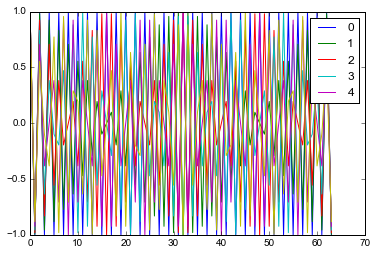

In [129]:
plot(M[:,32:38]);
legend(arange(nshow));

C:\a\WinPython\python-3.4.2.amd64\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


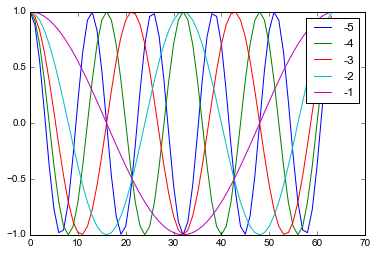

In [130]:
plot(M[:,-nshow:]);
legend(arange(-nshow,0));

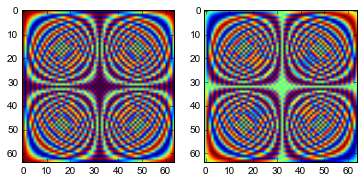

In [131]:
subplot(121); imshow(real(M));
subplot(122); imshow(imag(M));

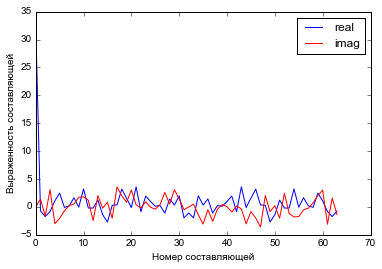

In [132]:
X=dot(M,x)
plot(n,real(X), n,imag(X),'r')
xlabel('Номер составляющей')
ylabel('Выраженность составляющей');
legend(['real','imag']);

Вектор или матрица преобразования симметричны относительно центра.
Это позволяет при вычислении экономить на операциях экспоненцирования. В результате разработан алгоритм *быстрого преобразования Фурье* (Fast Fourier Transform, FFT ), выполняющийся за $\mathcal{O}[N\log N]$.

При просмотре спектра интересны значения больше нуля, т.е. вторая половина, поэтому для отображения в привычных координатах используется команда `fftshift`.

In [133]:
xf=fft.fft(x)
x2=fft.ifft(xf)
allclose(x,x2)

True

In [134]:
x[:5]

array([ 0.92340991,  0.02906416,  0.5909391 ,  0.64069107,  0.3328954 ])

In [135]:
x2[:5]

array([ 0.92340991 -2.77555756e-17j,  0.02906416 +8.67361738e-19j,
        0.59093910 -2.14345605e-17j,  0.64069107 -2.60208521e-17j,
        0.33289540 -1.38777878e-17j])

In [136]:
abs(x2)[:5]

array([ 0.92340991,  0.02906416,  0.5909391 ,  0.64069107,  0.3328954 ])

In [137]:
sum(abs(x2)==x) / float(N)

0.25

команда `allclose` сравнивает матрицы и возвращает `True`, если все элементы одинаковы, независимо от комплексности и погрешности.

In [141]:
X[:5], xf[:5]

(array([ 32.55950542+0.j        ,  -0.72856301+1.38031783j,
         -1.73204470-1.61522852j,  -0.83738027+3.10593817j,
          1.07104834-3.00202311j]),
 array([ 32.55950542+0.j        ,  -0.72856301+1.38031783j,
         -1.73204470-1.61522852j,  -0.83738027+3.10593817j,
          1.07104834-3.00202311j]))

In [144]:
x3=dot(inv(M), X)
abs(x3)[:5]

array([ 0.92340991,  0.02906416,  0.5909391 ,  0.64069107,  0.3328954 ])

## Улучшенные методы спектрального анализа

http://nipy.org/nitime/examples/multi_taper_spectral_estimation.html

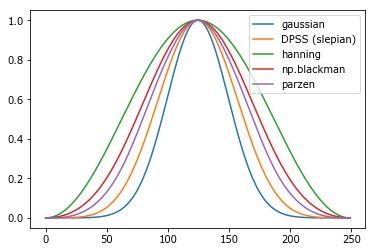

In [5]:
fs=250.
plot(signal.windows.gaussian(int(fs), fs/10), label='gaussian')
plot(signal.windows.dpss(int(fs), fs/10/5), label='DPSS (slepian)')
# plot(signal.windows.hamming(int(fs)), label='hamming')
plot(signal.windows.hann(int(fs)), label='hanning')
plot(np.blackman(int(fs)), label='np.blackman')
plot(signal.windows.parzen(int(fs)), label='parzen')
legend();

## Wavelet анализ

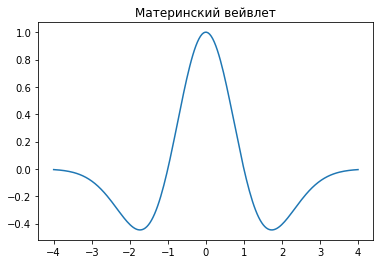

In [23]:
t=linspace(-4,4,200)
psi=lambda t: (1-t**2)*exp(-t**2/2)

plot(t,psi(t));
title(u'Материнский вейвлет');

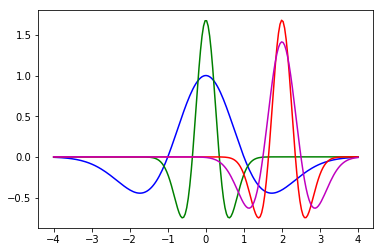

In [22]:
m,n = 1.5, 0
psi2 = lambda t: 2**(m/2) * psi(2**m*(t - n))

plot(t,psi(t),'b');
plot(t,psi2(t),'g');
m,n = 1.5, 2.0
plot(t,psi2(t),'r');
m,n = 1., 2.0
plot(t,psi2(t),'m');

## Спектрограмма

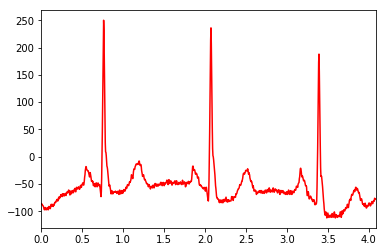

In [20]:
y = load('ecg.npy')
fs = 250.
t = arange(0, len(y)/fs, 1/fs)
plot(t, y, 'r'); xlim(t[0],t[-1]);

колебания потенциала охватом в три кардиоцикла

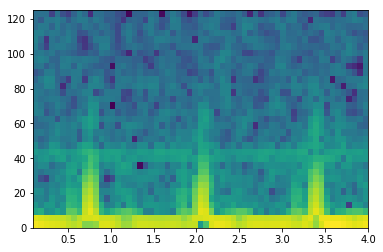

In [18]:
specgram(y, Fs=fs, NFFT=64, noverlap=48);

## +++:

- http://pywavelets.readthedocs.io/en/latest/